# Exploring Traffic Indicators in the I-94

## Introduction

#### John Hogue made a data set about traffic indicators in the I-94 available [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume). The data we will explore describes the flow of westward-traffic at the midway point between Minneapolis and St. Paul, and was measured hourly for roughly 5.5 years between 2012 and 2018. Through this analysis, we aim to determine the influence of multiple events in the flow of traffic volume for the aforementioned area.

#### We can see the multiple columns below:

In [1]:
# importing pandas
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# printing the first five rows
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
# printing bottom 5 rows
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


#### The columns above consist of a mix of categorical and numerical variables. The dataset documentation describes them as following:
- holiday: Categorical, US National holidays plus regional holiday, Minnesota State Fair
- temp: Numeric, Average temp in kelvin
- rain_1h: Numeric, Amount in mm of rain that occurred in the hour
- snow_1h: Numeric, Amount in mm of snow that occurred in the hour
- clouds_all: Numeric, Percentage of cloud cover
- weather_main: Categorical, Short textual description of the current weather
- weather_description: Categorical, Longer textual description of the current weather
- date_time: DateTime, Hour of the data collected in local CST time
- traffic_volume: Numeric, Hourly I-94 ATR 301 reported westbound traffic volume

#### Now let's look at basic information on the data set:

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### From our data set, we learn we have 48,204 rows split into the 9 columns described above. The information collected shows that the column types mostly match the descriptions provided and that there are no nulls. We see that the date_time column, which describes the hour at which data was collected, is made up of strings and might need to parsed for further analysis.


## Exploring Distribution of Traffic Volume

#### Now that we know this,we can start by plotting the traffic_volume to start exploring its distribution. For this, we will need the matplotlob inline along with the pyplot library.

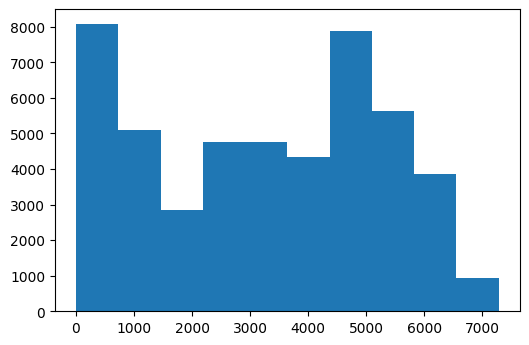

In [4]:
# we need the mtplotlib inline magic to allow charts to appear in Jupyter
%matplotlib inline

# importing matplotlib
import matplotlib.pyplot as plt

# plotting the traffic volume distribution
plt.hist(traffic['traffic_volume'])
plt.show()

In [5]:
# looking into statistics for the traffic_volume column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### The distribution of traffic volume is quite even up to 6500/hour, with peaks at 0-500 and 4500-5000. Overall statistics show that at least half of the time, there are over 3000 cars moving westwards. A minimum of 0 could be expected and perhaps explained by a combination of nightime and environmental factors.

### Day vs Night Traffic

#### The dip in the 1500-2000/hour range is interesting. We will attempt to plot the hourly traffic volume to try and figure out if time of day is a factor on traffic volumes. 

#### Before doing that, we need to make sure that the 'date_time' column is in the appropriate format, so that we can then create a new column in our data set where we extract the hour from the date_time column.

In [6]:
# converting the date_time column to its proper format
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# creating the new column
traffic['hour'] = traffic['date_time'].dt.hour

In [7]:
# verifying that the new column works
traffic['hour'].head()

0     9
1    10
2    11
3    12
4    13
Name: hour, dtype: int64

#### With the new column we can now take a look at the average traffic volume per hour

In [8]:
# look at hourly averages for traffic volume
traffic.groupby('hour')['traffic_volume'].mean()

hour
0      834.781051
1      516.449000
2      388.353640
3      371.090864
4      702.551889
5     2094.573437
6     4140.503594
7     4740.181337
8     4587.497115
9     4385.277502
10    4184.665544
11    4465.877561
12    4718.293095
13    4714.940682
14    4931.888776
15    5240.524302
16    5663.756539
17    5310.076048
18    4263.718530
19    3276.394187
20    2834.667509
21    2668.940464
22    2199.405717
23    1469.135294
Name: traffic_volume, dtype: float64

#### We can observe here that the peak hour is between 15-17pm, likely when most people are returning from work. Between 6am and 18pm there are at least 4000 cars per hour, and traffic volume falls significantly outside that range. We can thus say that traffic is indeed affected by time of the day, with 'night time' having significant less traffic than 'day time'.

#### To further explore this, we will divide traffic into two groups:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

#### Below, we will split the data set into the two desired groups and explore results:

In [9]:
# create copy with day time hours and print shape
day = traffic.copy()[ (traffic['hour'] >= 7) & (traffic['hour'] < 19)]
print(day.shape)

# create copy with night time hours and print shape
night = traffic.copy()[ (traffic['hour'] < 7) | (traffic['hour'] >= 19)]
print(night.shape)

(23877, 10)
(24327, 10)


In [10]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

#### It looks like the day time data set has about 400 less observations, which is probably due to missing numbers. We also see that the former has roughly 3000 cars per hour more than the latter.

## Exploring Distribution of Traffic Volume II

#### Now that we have both data sets, we can plot the traffic volume distributions for both. We will use a side-by-side grid chart for better comparison:

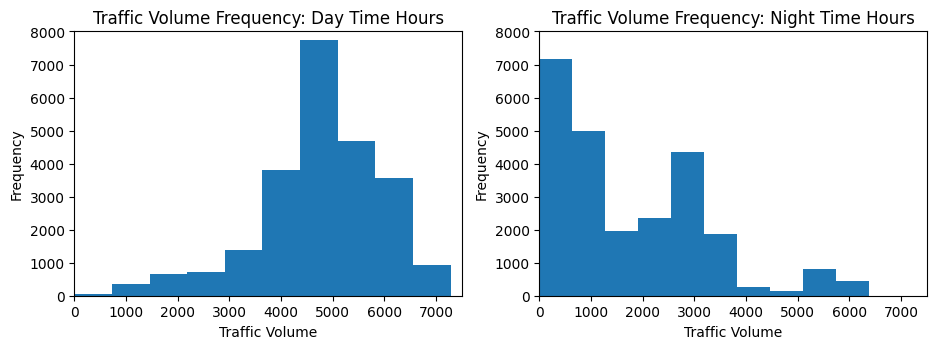

In [12]:
# creating the figure where both plots will go
plt.figure( figsize = (11, 3.5))

# first chart
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume Frequency: Day Time Hours')
plt.xlim(0, 7500)
plt.ylim(0, 8000)

# second chart
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume Frequency: Night Time Hours')
plt.xlim(0, 7500)
plt.ylim(0, 8000)

# display the charts
plt.show()

#### It would appear that most day-time hours see 4500-5000 cars in westward traffic, with a left-skewed shape. The opposite is tru for night-time hours, with most observations detecting less than 2500 cars per hour. Let's look up more statistics on these tables:

In [13]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

#### These statistics further confirm our observations on traffic being much higher during daytime hours. Since the objective of this analysis is to detect reasons for heavy traffic, we will focus on the day-time data going forward.

## Time Indicators

#### Now that we decided on using only the day-time dataset, one of the things we can look into is different time indicators. In this case, we will look at how traffic volume changed according to:
- Month
- Day of the week
- Time of day

#### To do so, we will create a column with the month of an hourly observation and then use the pd.groupby() method


In [15]:
# creating the new column
day['month'] = day['date_time'].dt.month

In [16]:
#create a series with the average traffic volume by month
# first groups the data frame by 'month', then selecets only the column 'traffic_volume', and finally finds the mean
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

#### Now that we have a data frame with all the averages by month, we can plot the average traffic volume by month to better observe how this changes.

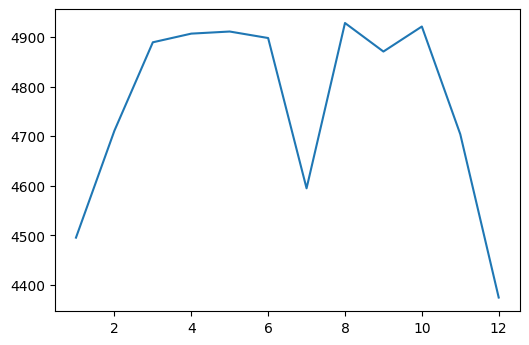

In [17]:
# line plot of avg traffic volumne by month
plt.plot(by_month['traffic_volume'])
plt.show()

#### As expected, winter months have lower average traffic volumes than the rest of the year. One interesting observation is that July seems to have lower traffic than the surrounding months.

In [18]:
# creating a new column for year
day['year'] = day['date_time'].dt.year

In [23]:
# create copy with only July data
only_july = day.copy()[ (day['month'] == 7) ]

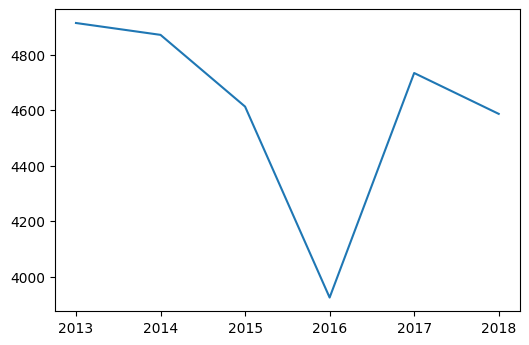

In [25]:
# plot yearly traffic volume for July data
plt.plot( only_july.groupby('year').mean()['traffic_volume'])
plt.show()

#### It appears that something happened in 2016 that dragged the average July traffic volume down. Given the time of year, a potential hypothesis would be construction disrupting the flow of traffic in the area

## Time Indicators II

#### We've looked at monthly traffic, now we'll touch on the day of the week. Thankfully, that is an attribute we can extract, so we can create a new column which specifies this value.

In [26]:
# create column with day of week
day['dayofweek'] = day['date_time'].dt.dayofweek

In [27]:
# create series with average day of week values
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

#### Now we can plot the average traffic volume by day of week.

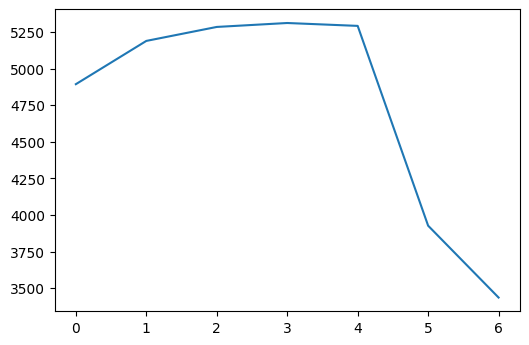

In [28]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

#### Initial results suggest that weekend days have on average at least 1000 cars per hour than working days

## Time Indicators III

#### We are now ready to look at time-of-day averages. However, this last visualization has shows us that weekends will drag the averages down. Since we want to study indicators of heavy traffic, we will not split the data between weekend days and working dats, and proceed only with the latter.

In [30]:
# create copy for business days only
business_days = day.copy()[ day['dayofweek'] <= 4]

# create copy for weekend days
weekend = day.copy()[ day['dayofweek'] >= 5]

# look at hourly traffic for business days
by_hour_business = business_days.groupby('hour').mean()
print(by_hour_business['traffic_volume'])

# look at hourly traffic for weekend days
by_hour_weekend = weekend.groupby('hour').mean()
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


#### Now we can plot business day and weekend hourly traffic side-by-side to compare results:

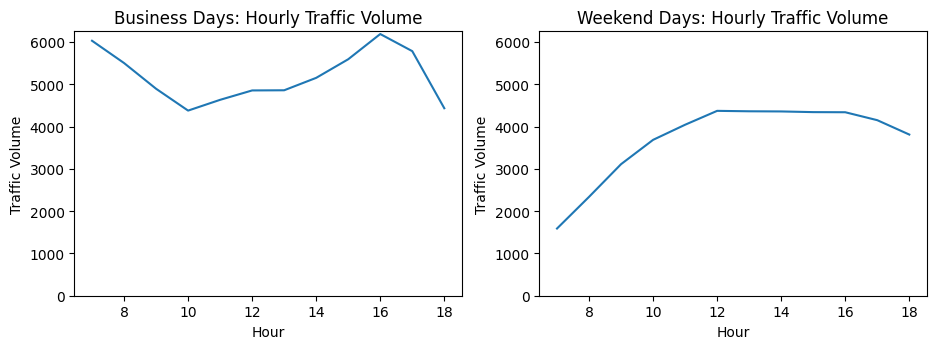

In [33]:
plt.figure( figsize = (11, 3.5))
# Plot business day traffic
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business Days: Hourly Traffic Volume')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.ylim(0, 6250)

#plot weekend traffic
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend Days: Hourly Traffic Volume')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.ylim(0, 6250)

# show plot
plt.show()

#### Generally speaking, business days have higher traffic volumes at all times compared to weekend days. We can also observe that while weekend days see a gradual increase in traffic that peaks around noon, business days have clear peaks that the times when people would be leaving for work (7 am) and when people would be driving back home (4-5 pm).

### Summarizing Time Indicator findings

#### So far, we've found that:
- Traffic is heavier during warm months
- Traffic is heavier during the day
- Traffic is heavier during business days
- Traffic is heavier during rush hours, when people go to or come from work

## Weather Indicators

#### We've already seen that traffic is heavier during warm months. The data set offers some columns with weather related information, let's try and see if we can find ahigh correlation between any of these and traffic_volume.

In [48]:
# correlation between traffic volume and numerical weather columns
# first looks at all the correlations in relation to traffic_volume, then picks only the desired columns
business_days.corr().loc[['traffic_volume','temp', 'rain_1h', 'snow_1h', 'clouds_all'],['traffic_volume','temp', 'rain_1h', 'snow_1h', 'clouds_all']]

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.139999,0.002728,-0.008016,-0.081708
temp,0.139999,1.000000,0.012623,-0.022037,-0.156291
rain_1h,0.002728,0.012623,1.000000,-0.000150,0.005307
snow_1h,-0.008016,-0.022037,-0.000150,1.000000,0.030986
clouds_all,-0.081708,-0.156291,0.005307,0.030986,1.000000


#### Within business days and daytime hours, the strongest correlation for traffic volume is 'temp', with a Pearson's R of 0.1399. The other's show a really weak correlation. We will now take this column and show a scatterplot with it in relation to traffic volume to try and better visualize this relationship.

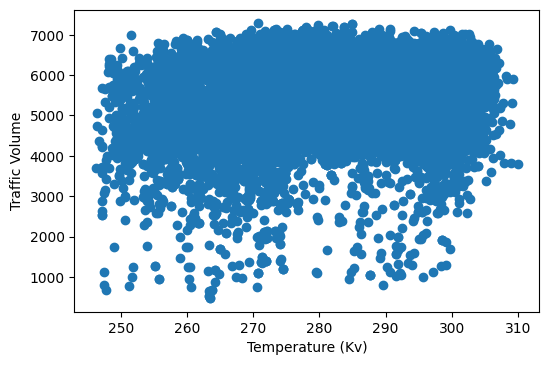

In [50]:
# scatter plot of traffic volume across different temperatures
plt.scatter(business_days['temp'], business_days['traffic_volume'])
plt.xlabel('Temperature (Kv)')
plt.ylabel('Traffic Volume')
plt.show()

#### It looks like temperature is not a reliable predictor of traffic volume. We will have to keep exploring the data.

## Weather Types

#### Since the numerical columns were not very helpful, let's try with the categorical columns: weather_main and weather_description. Let's first look at average traffic volumes for each:

In [51]:
# averages by weather_main
by_weather_main = day.groupby('weather_main').mean()
# averages by weather description
by_weather_description = day.groupby('weather_description').mean()

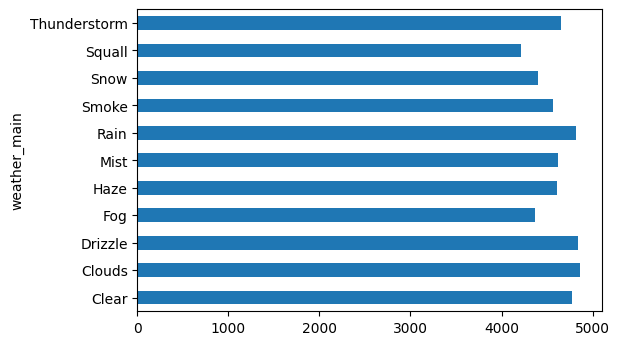

In [53]:
# horizontal bar plot for weather main
by_weather_main['traffic_volume'].plot.barh()
plt.show()

#### Seems like not weather type reaches the 5000 cars per hour mark, and all types are fairly even. Let's look into the weather_description subtypes.

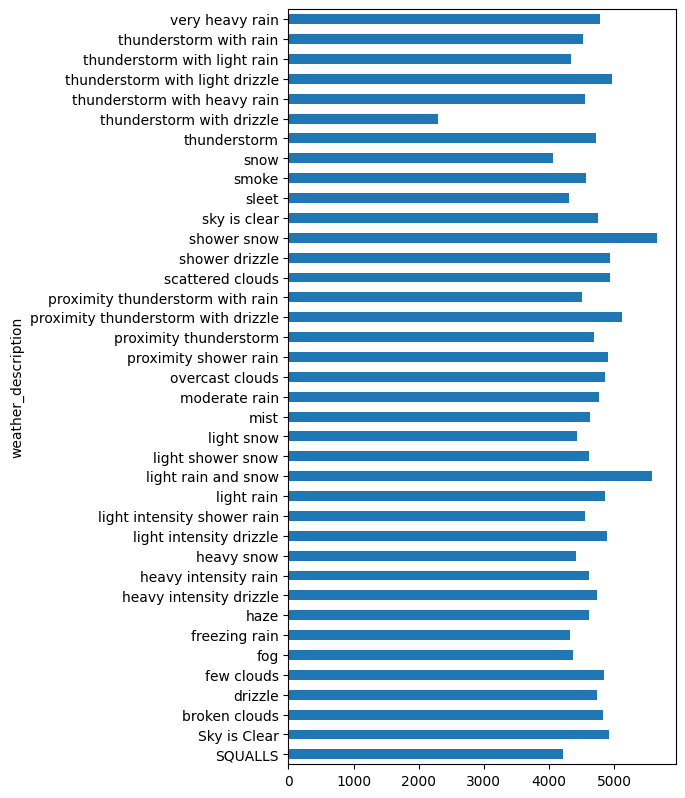

In [55]:
# horizontal bar plot for weather_description
by_weather_description['traffic_volume'].plot.barh(figsize= (5,10))
plt.show()

#### It appears like there are a few weather types that lead to a 5000+ cars per hour traffic volume. Let's take a closer look to confirm.

In [56]:
by_weather_description[ by_weather_description['traffic_volume'] >= 5000]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year,dayofweek
weather_description,,,,,,,,,
light rain and snow,275.607500,0.3175,0.0,83.500000,5579.750000,15.000000,7.5,2013.500000,1.25
proximity thunderstorm with drizzle,287.913333,0.2600,0.0,87.833333,5121.833333,12.166667,8.5,2015.333333,2.50
shower snow,268.680000,0.0000,0.0,90.000000,5664.000000,7.000000,3.0,2013.000000,4.00


#### There are 3 weather types that match the 5000+ traffic volume condition:
- light rain and snow
- proximity thunderstorm with drizzle
- shower snow

#### Overall, we could say that these results are not conclusive. Perhaps these weather conditions are bad enough to make people drive slower, but not bad enough to cause individuals to stay home instead of driving to work or taking public transport.

## Conclusions

#### It is hard to point out a single reason for heavier traffic, but there are a few conditions that make it more likely:

- Time of day conditions:
    - Warm months
    - Business days
    - Rush hours

- Weather conditions:
    - light rain and snow
    - proximity thunderstorm with drizzle
    - shower snow